

# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will analyze the data associated with patients who do not show for their appointments in Brazil. I will be using the "No-show appointments" dataset. This dataset includes patient id's, appointment id's, gender, scheduled day, appointment day, age, neighborhood, scholarhip, hypertension, diabetes, alcoholims, handicap, sms received, and no-show columns. 

The scheduled day column is the date the appointment was scheduled, while the appointment day column is the day of the actual appointment.

Neighborhood is the location of where the appointment will take place.

The scholarship column has a yes or no if the patient was enrolled in the "Bolsa Familia" social welfare program.

the sms received column is if the patient was sent 1 or more text messages.

In the no-show column there is a "Yes" if the patient did not show, and a "No" if the patient did show up.
I will be changing these labels.

All other columns are self-explanatory.

All cells labled with a 0 or 1; 0 is for "No" and 1 is for "Yes".




### Question(s) for Analysis

The question for analysis is, "What is the most likely reason patients miss their appointments?".

And, we will also find out which factors play an important role in this prediction.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


First, I will load in the dataset I chose using Pandas.

In [171]:
## Here I load the dataset using the read_csv function

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Then I would like to view the what some of the data looks like; how it is formatted, column names,etc. I will do this using the head function.

In [172]:
## df.head() function prints out the first 5 rown in a dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Then I would like to know how many rows, and columns there are in total in this dataset. I wil ldo this by using the shape function.

In [173]:
## the shape function prints out the amoutn of rows, and columns in ths format: (rows, columns).

df.shape

(110527, 14)

Next, I will look aat some statistics about the datset. Such as, the mean age, and unique items ine each column. I will do this by using the describe function.

In [174]:
## Here I use the describe function with the include parameter to show all columns.

df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,147496265710392,5675305,NaN,NaN,NaN,37,NaN,0,0,0,0,0,0,NaN
std,256094920291739,71296,NaN,NaN,NaN,23,NaN,0,0,0,0,0,0,NaN
min,39218,5030230,NaN,NaN,NaN,-1,NaN,0,0,0,0,0,0,NaN
25%,4172614444192,5640286,NaN,NaN,NaN,18,NaN,0,0,0,0,0,0,NaN
50%,31731838713978,5680573,NaN,NaN,NaN,37,NaN,0,0,0,0,0,0,NaN
75%,94391720898175,5725524,NaN,NaN,NaN,55,NaN,0,0,0,0,0,1,NaN


I want to see if there are any columns with missing or duplicated data, and decide on which columns I will be using for my analysis. I will acheive this by using the info function. 

In [175]:
""" Here the info function is uded to print out the columns, and specific information such as; 
column name, the data type for each column, and whether or not there are any null values"""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [176]:
## Here I check for duplicates

sum(df.duplicated())

0

Looks like all the values in the dataset are non-null values. 

I serached for duplicates and I found 27,964 dupliucates, which I will be rmoving.

I have also decided on which columns I will be removing to make my analysis easier. 

I will be removing the appointment ID, schedule day, and appointment day columns; as I do not expect these to play important factors in my analysis. I will also be removing one from the analysis as it has a negative age, as well as all tghe duplicates in the data.

I also noticed this data shows the patient id in scientific notation. I will be changing this to an integer to make it easier to read.

I wil also be making a few changes in spelling, for a couple of the labels.


### Data Cleaning


First thing I want do is remove the columns I do not plan to use in my analysis. In this case I will be removing the appointment ID, schedule day, and appointment day columns. I will do this by using the drop function.

In [177]:
## Here I will use the drop function to remove the columns I will not be using.

df.drop(['AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [178]:
## Now I will print out the first 5 rows after removing the uneccessary columns.

df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


On to find the row with the negative age.

In [179]:
## Here I sorted the value in descending order to find the negative age using the sort values function.

df.sort_values('Age', ascending=False)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
68127,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,F,115,SÃO JOSÉ,0,1,0,0,0,1,No
63912,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
2969,452418952997,F,0,RESISTÊNCIA,0,0,0,0,0,1,No
2970,4442457866355,M,0,RESISTÊNCIA,0,0,0,0,0,0,No
56706,51822675643792,M,0,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No
101311,4419954231623,M,0,DO MOSCOSO,0,0,0,0,0,1,No


Now to remove the row with negative value.

In [180]:
## Here I drop the row with the negative value for age.

df.drop(99832, axis=0, inplace=True)

We now see the row with the negative value is gone.

In [181]:
## and here I sort it one more time to see if the negative value was dropped, and it was.

df.sort_values('Age', ascending=False)

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
68127,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,F,115,SÃO JOSÉ,0,1,0,0,0,1,No
63912,31963211613981,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
27550,3791163514832,M,0,MARUÍPE,0,0,0,0,0,0,No
27557,982799219678115,F,0,SANTA CECÍLIA,0,0,0,0,0,1,Yes
27558,56727644655921,F,0,MARUÍPE,0,0,0,0,0,0,No
98247,364724578963742,F,0,JABOUR,0,0,0,0,1,0,No


Next I will be removing all the duplicates.

In [182]:
## Here U use the drop duplicates function to remove all the duplicates

df.drop_duplicates(inplace=True)

We now have 82,562 entries, as all the duplicates have been removed

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82562 entries, 0 to 110524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientId      82562 non-null  float64
 1   Gender         82562 non-null  object 
 2   Age            82562 non-null  int64  
 3   Neighbourhood  82562 non-null  object 
 4   Scholarship    82562 non-null  int64  
 5   Hipertension   82562 non-null  int64  
 6   Diabetes       82562 non-null  int64  
 7   Alcoholism     82562 non-null  int64  
 8   Handcap        82562 non-null  int64  
 9   SMS_received   82562 non-null  int64  
 10  No-show        82562 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 7.6+ MB


Now I will convert the patient ID, from scientific notation to an integer.

In [184]:
## Here is how I changed the scientific notation to an integer using the options function.

pd.options.display.float_format = '{:.0f}'.format


In [185]:
## Here is the first 5 rows with the patient ID as an integer.

df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now I will some changes in spelling, for the labels. Specfically; neighbourhood, patient id, hyperstension, and handicap. I will do this using the reanme function.

In [186]:
## Here I will be changing the column names using the rename function.

df.rename(columns={'PatientId':'PatientID', 'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

In [187]:
## Now I will be changing the "Yes" and "No" in the "No-show" column to 'Showed' and "Did not show".

df['No-show'].replace({'No': 'Showed', 'Yes': 'Missed'}, inplace=True)

In [188]:
## Here are the column name changes. 

df.head()

,PatientID,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,558997776694438,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,4262962299951,F,62,MATA DA PRAIA,0,0,0,0,0,0,Showed
3,867951213174,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed
4,8841186448183,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed


<a id='eda'></a>
## Exploratory Data Analysis


In this section I will explore the data set and observe any trends in the data. We will also try and predict if a patient will miss an appointment, or not. We will do this by analyzing different variables in the dataset.

At first look I see, in the fgure below, may not play a role in patients missing their appointments.

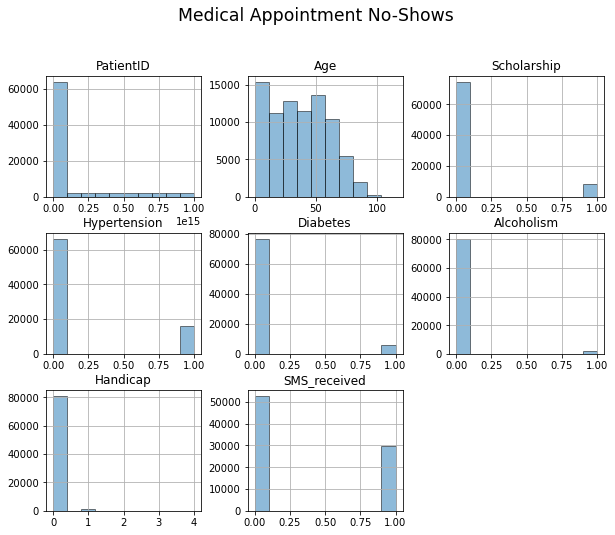

In [189]:
## Here I used a basic histogram function to plot all the variables in the dataset.

df.hist(alpha=.5, rwidth=1, ec='black', figsize=(10,8));
plt.suptitle('Medical Appointment No-Shows', x=0.5, y=1, fontsize='xx-large');

### Is Age A Factor For Patients Missing Appointments?

Here I will be doing an analysis on age, and if it has any effect on whether pateints miss their appointments.

In this fist figure I see that more users attend their appointments.

Although I do see that the younger crowd, mostly patients under the age 40 are most likely to miss their appointment.

In [190]:
## Here I find the mean age for the dataframe

print('The average age is:', int(np.mean(df['Age'])), 'years old.')

The average age is: 36 years old.


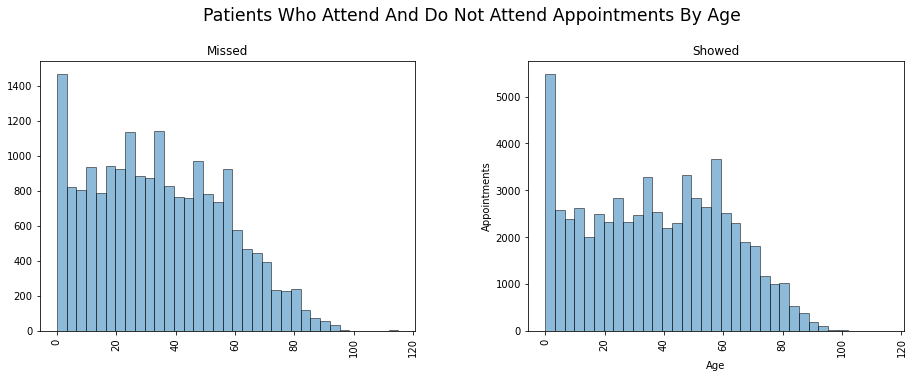

In [191]:
"""Here I used another histogram to make two plots, both grouped by age, one for patients who attended their appointments 
and onefor patients who missed their appointment"""

df.hist(column='Age', by='No-show', bins=35, alpha=.5, rwidth=1, ec='black', figsize=(15,5));
plt.suptitle('Patients Who Attend And Do Not Attend Appointments By Age', x=0.5, y=1.05, fontsize='xx-large');
plt.xlabel('Age');
plt.ylabel('Appointments');

### Is Gender A Factor For Patients Missing Appointments?

In this figure I analyze if gender is a factor for patients missing their appointments.

Although, females make up for most of the data I see that more females miss their appointment than their male counterparts, as pictured in the "Yes" histogram; it is also clear that more females attend their appointments than males.

Gender may be a factor.

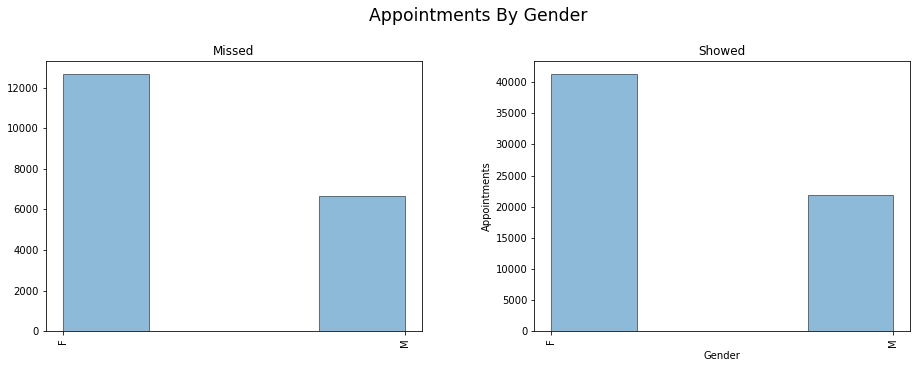

In [192]:
""""Her I made two histograms. One for both females, and males that attended their appointments; 
and one for males and females that missed their appointments"""

df.hist(column='Gender', by='No-show', bins=4, alpha=.5, rwidth=1, ec='black', figsize=(15,5));
plt.suptitle('Appointments By Gender', x=0.5, y=1.05, fontsize='xx-large');
plt.xlabel('Gender');
plt.ylabel('Appointments');

### Creating A Function For A Pie Chart

In [193]:
''' I know I will be using a lot of pie charts in this analysis, so I will be creating a function that creates
a pie chart using a variable as the parameter.'''

def medpie(col):
    explode = (0.25, 0.0);
    df.groupby(['No-show']).sum().plot(kind='pie', y=col, autopct='%1.0f%%', 
                                  colors = ['green', 'red'], figsize=(10,8), shadow=True, explode=explode);
    plt.title('Appointments For Patients With '+col, fontsize='xx-large',x=0.5, y=1.05);

### Is The Welfare Program A Factor For Patients Missing Appointments?

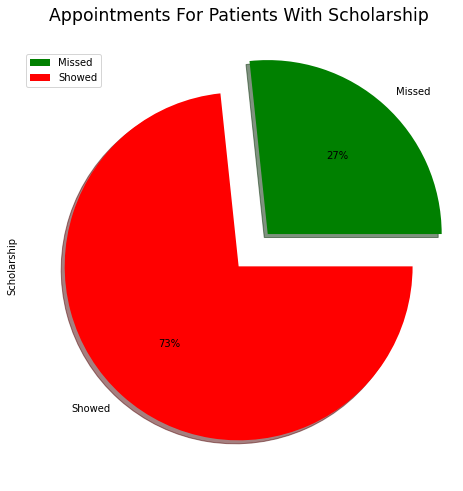

In [194]:
''' Here I use a pie chart to see the percentage of patients in the Welfare Program 'Bolsa Familia',
that miss or attend their appointments'''

medpie('Scholarship')

As we can see here 73% of patients in the program do attend their appointments.

### Is Hypertension A Factor Why Patients Miss Their Appointments?

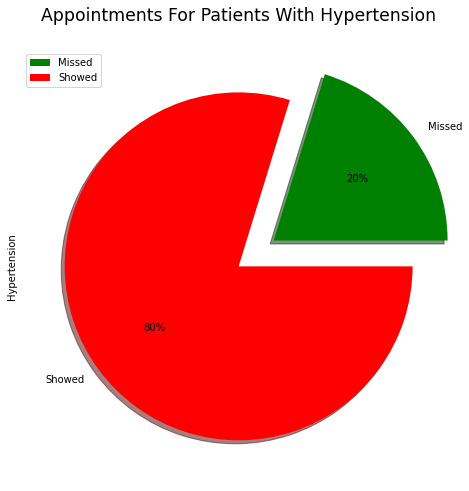

In [195]:
''' Here I use the function I created to see the percentage of patients with hypertension,
that miss or attend their appointments'''

medpie('Hypertension')

We can see here that 80% of the patients with hypertension attend their meetings. 

### Is Diabetes A Factor Why Patients Miss Their Appointments?

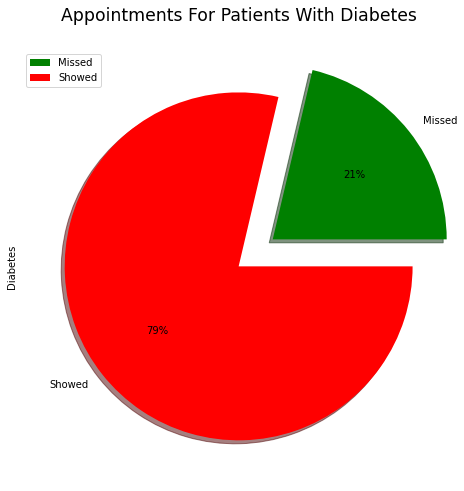

In [196]:
''' Here I use a pie chart to see the percentage of patients with diabetes,
that miss or attend their appointments'''


medpie('Diabetes')

And once again we see that diabetes is not a factor, as 79% of the patients with diabetes attend their appointments.

### Is Alcoholism A Factor Why Patients Miss Their Appointments?

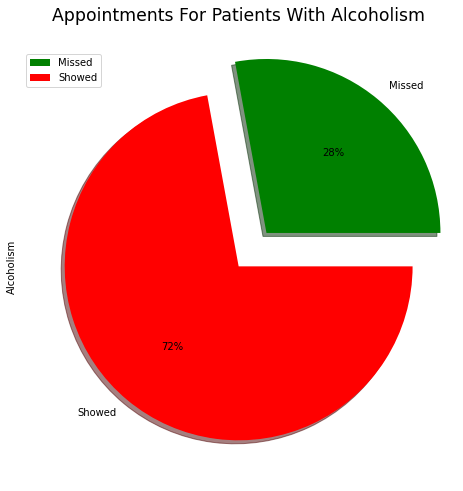

In [197]:
''' Here I use a pie chart to see the percentage of patients with diabetes,
that miss or attend their appointments'''


medpie('Alcoholism')

So, far the lowest attendance rate is patients with alcoholism at 72%. Here we can see that most patients with alcoholism still attend their meetings.

### Is Having A Handicap  A Factor Why Patients Miss Their Appointments?

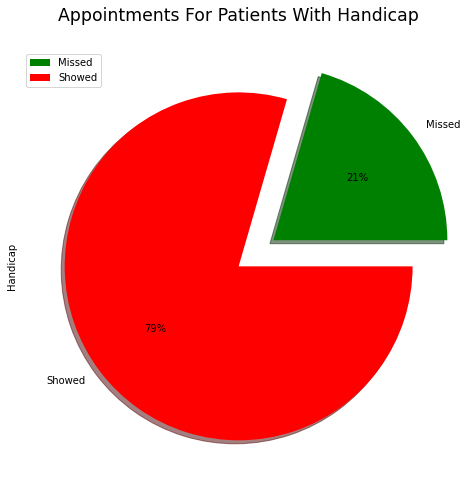

In [198]:
''' Here I use a pie chart to see the percentage of patients with diabetes,
that miss or attend their appointments'''


medpie('Handicap')

As we can see in this pie chart, 79% percent of patients with a handicap attend their meetings. 

<a id='conclusions'></a>
## Conclusions

So, the most likely reason patients miss their appointments is if they suffer from alcoholism. Only 72% of patients who received a reminder for their appointment attended their appointment. Coming in at a close second would be if the patient suffers from diabetes, and or a handicap at 79%. 

The data could be further explored to try and see if a patients will miss an appointment  can be predicted. Maybe using a combination of factors, and some machine learning.

### Limitation

The limitations for this analysis would be that we are working with sample data, as the population is Brazil is far greater than the sample in this analysis.

Also, the data may not be as accurate as proposed. Some patients may not enter correct information when seen.

## Submitting your Project 



## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0